# Exercise 

Import the 6 of your selected stocks and select the Adjusted Close (Adj Close) for all six stocks from 31-12-2015 (incl.) until 2023-03-31 (incl.). Save the DataFrame in the variable stocks and work through the next questions with this DataFrame!

- Visualize the Adjusted Close of the six stocks over time!
- Visualize the normalized Adjusted Close of the six stocks over time, each starting at a Base Value of 100!
- Calculate monthly returns for all six stocks and create a new returns DataFrame!
- Calculate the annualized mean return and the annualized standard deviation of returns for all six stocks!
- Visualize risk/return of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis).
- Identify the best performing stock and the worst performing stock (in terms of risk / return)
- Visualize the correlation matrix of monthly returns with a Seaborn Heatmap. Which stocks-pair shows the highest (positive) correlation of monthly returns?

In [1]:
import pandas as pd 
from pandas_datareader import data as wb
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import yfinance

In [2]:
yfinance.pdr_override()

In [3]:
tickers = ['HEXA.jk', 'UNTR.jk', 'BSSR.jk', 'MPMX.jk', 'AMRT.jk', 'MBAP.jk']
adj_close = pd.DataFrame()
for ticker in tickers : 
    adj_close[ticker] = wb.get_data_yahoo(ticker, start = '2015-12-31', end = '2023-03-31')['Adj Close']
adj_close.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,HEXA.jk,UNTR.jk,BSSR.jk,MPMX.jk,AMRT.jk,MBAP.jk
Date,,,,,,
2016-01-04,312.194611,12126.803711,447.778259,160.341553,541.157227,503.082611
2016-01-05,315.986481,12315.109375,447.778259,158.285889,541.157227,503.082611
2016-01-06,310.930695,12597.565430,447.778259,162.739822,559.817749,503.082611
2016-01-07,317.250427,12220.958008,403.403870,166.165939,559.817749,503.082611
2016-01-08,305.874908,12239.787109,403.403870,155.545029,541.157227,503.082611


## Adj Closing Price

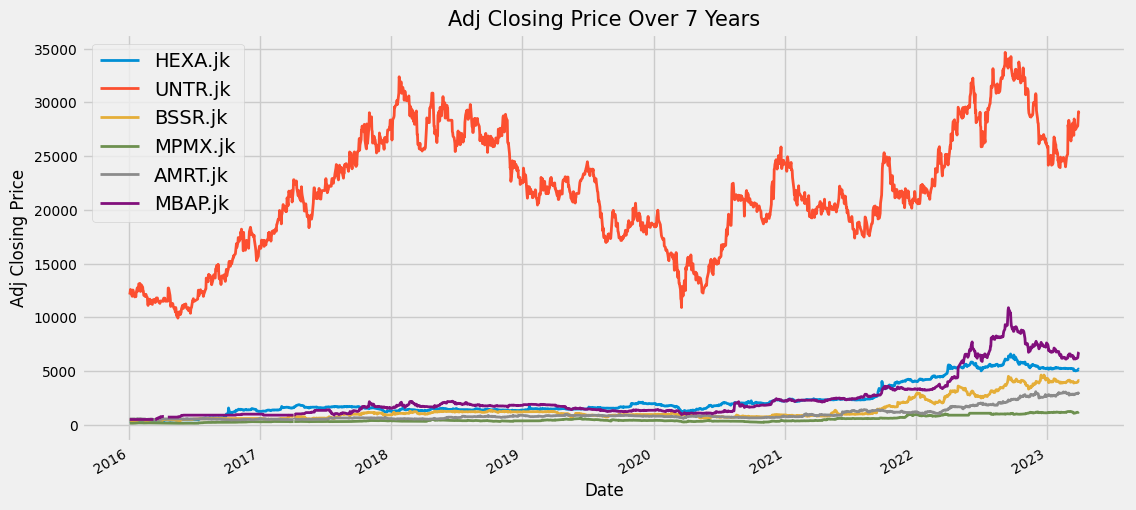

In [4]:
plt.style.use('fivethirtyeight')
adj_close.plot(figsize = (12,6), fontsize = 10, linewidth = 2)
plt.title('Adj Closing Price Over 7 Years', size = 15)
plt.ylabel('Adj Closing Price', size = 12)
plt.xlabel('Date',size = 12)
plt.show()

## Normalize Adj Closing Price 

In [5]:
norm_adj_close = adj_close / adj_close.iloc[0] * 100
norm_adj_close

,HEXA.jk,UNTR.jk,BSSR.jk,MPMX.jk,AMRT.jk,MBAP.jk
Date,,,,,,
2016-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-01-05,101.214585,101.552805,100.000000,98.717947,100.000000,100.000000
2016-01-06,99.595151,103.881993,100.000000,101.495726,103.448263,100.000000
2016-01-07,101.619444,100.776415,90.090097,103.632487,103.448263,100.000000
2016-01-08,97.975717,100.931683,90.090097,97.008558,100.000000,100.000000
...,...,...,...,...,...,...
2023-03-24,1617.580774,228.213474,879.899798,726.573979,541.432297,1227.432605
2023-03-27,1625.588600,229.244248,891.066039,729.692322,535.888621,1242.340694
2023-03-28,1649.612077,235.635050,906.698777,723.455636,550.671756,1287.064959


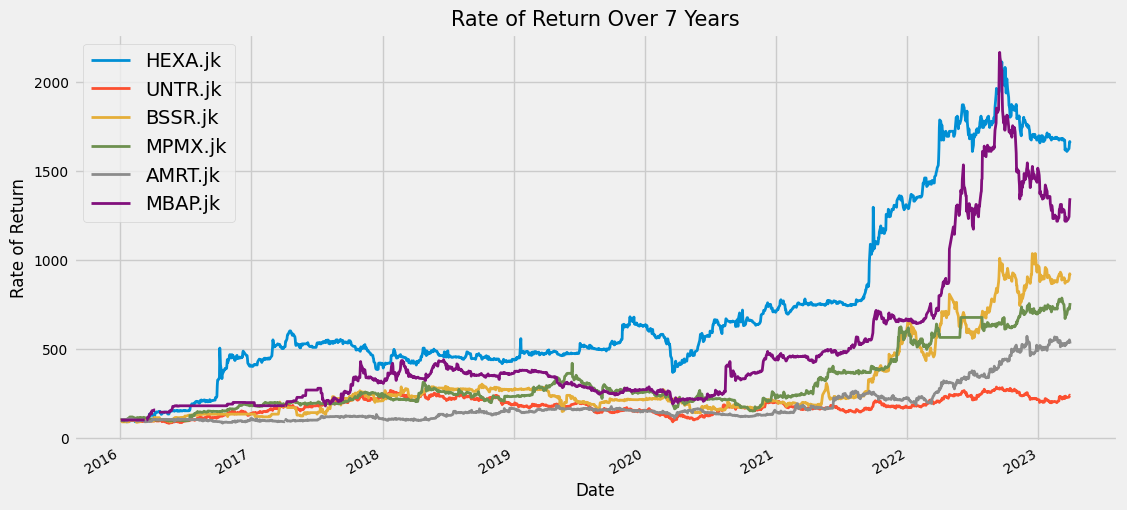

In [6]:
norm_adj_close.plot(figsize = (12,6), fontsize = 10, linewidth = 2)
plt.title('Rate of Return Over 7 Years', size = 15)
plt.ylabel('Rate of Return', size = 12)
plt.xlabel('Date',size = 12)
plt.show()

## Calculating Monthly Return of The Stocks

In [7]:
monthly_closing = adj_close.resample('BM').last()
monthly_return = monthly_closing.pct_change()
monthly_return.dropna(inplace = True)
monthly_return

,HEXA.jk,UNTR.jk,BSSR.jk,MPMX.jk,AMRT.jk,MBAP.jk
Date,,,,,,
2016-02-29,0.008333,-0.107759,-0.125000,-0.027273,-0.065574,0.004484
2016-03-31,0.322314,-0.014493,-0.000684,-0.084112,0.043860,0.517857
2016-04-29,0.103125,-0.019608,0.100000,-0.020408,0.008403,-0.052941
2016-05-31,0.048159,-0.024725,0.027273,-0.066667,0.000000,0.225216
2016-06-30,0.032432,0.042254,0.150443,-0.003179,0.007428,0.018767
...,...,...,...,...,...,...
2022-11-30,-0.059829,-0.046440,-0.028825,0.121951,0.095745,-0.049689
2022-12-30,-0.040909,-0.153409,0.121633,-0.026087,-0.142395,-0.003268
2023-01-31,0.009479,-0.058485,-0.064516,0.053571,0.067925,-0.104918


## Calculating Annual Return & Annual Risk

In [8]:
daily_change =  adj_close.pct_change().dropna()
daily_change.head()

,HEXA.jk,UNTR.jk,BSSR.jk,MPMX.jk,AMRT.jk,MBAP.jk
Date,,,,,,
2016-01-05,0.012146,0.015528,0.000000,-0.012821,0.000000,0.0
2016-01-06,-0.016000,0.022936,0.000000,0.028139,0.034483,0.0
2016-01-07,0.020325,-0.029895,-0.099099,0.021053,0.000000,0.0
2016-01-08,-0.035857,0.001541,0.000000,-0.063917,-0.033333,0.0
2016-01-11,-0.066116,-0.023077,0.000000,-0.015418,0.034483,0.0


In [9]:
daily_summary =  daily_change.describe().T.loc[:,['mean', 'std']]
daily_summary

,mean,std
HEXA.jk,0.001860,0.025789
UNTR.jk,0.000778,0.024511
BSSR.jk,0.001829,0.035406
MPMX.jk,0.001438,0.025752
AMRT.jk,0.001258,0.026202
MBAP.jk,0.001752,0.025610


In [10]:
annual_summary = daily_summary.copy()
annual_summary['mean'] = annual_summary['mean'] * 250
annual_summary['std'] = annual_summary['std'] * 250 **0.5
annual_summary.head()

,mean,std
HEXA.jk,0.465012,0.407759
UNTR.jk,0.194457,0.387546
BSSR.jk,0.457229,0.559821
MPMX.jk,0.359585,0.407179
AMRT.jk,0.314410,0.414291


## Visualizing Risk/Return

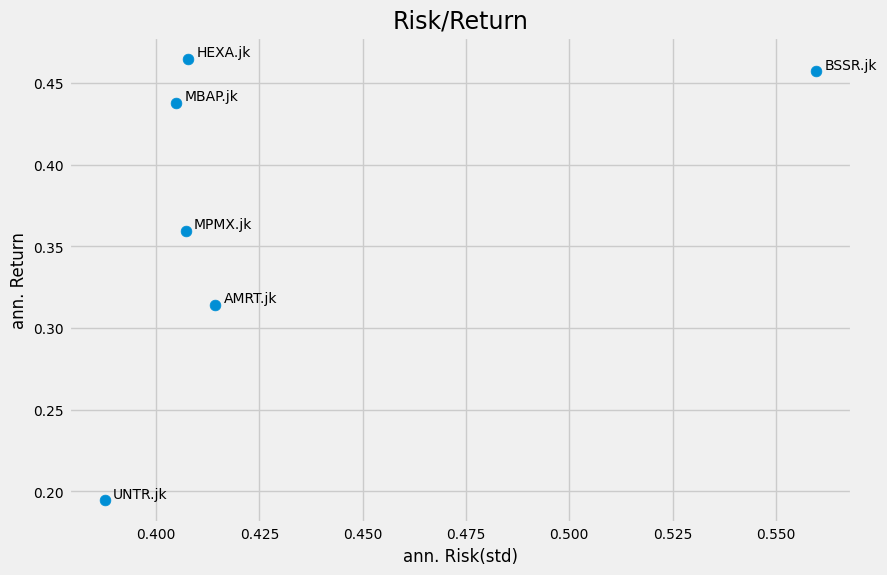

In [11]:
annual_summary.plot.scatter(x = 'std', y='mean', figsize = (9,6), fontsize = 10, s =60)
for index in annual_summary.index :
    plt.annotate(index, xy = (annual_summary.loc[index, 'std'] + 0.002, annual_summary.loc[index, 'mean'] + 0.0015), fontsize = 10)
plt.title('Risk/Return', size = 17)
plt.xlabel('ann. Risk(std)', size = 12)
plt.ylabel('ann. Return', size = 12)
plt.show()

### Stock Performance on Risk Return Ratio

Based on chart above the best performing stock in term of risk reward were either **MBAP** or **HEXA** as both of that stock have an annual risk lower than **0.42** which is similar or lowered compared to 3 other stocks, while having an annual return of above **0.40**. While in this chart the worst performing stock in term of risk return is **BSSR** as it has way higher risk compared to other stocks, however it's annual return still lower than **HEXA**  

## Visualizing Correlation Between Stocks 

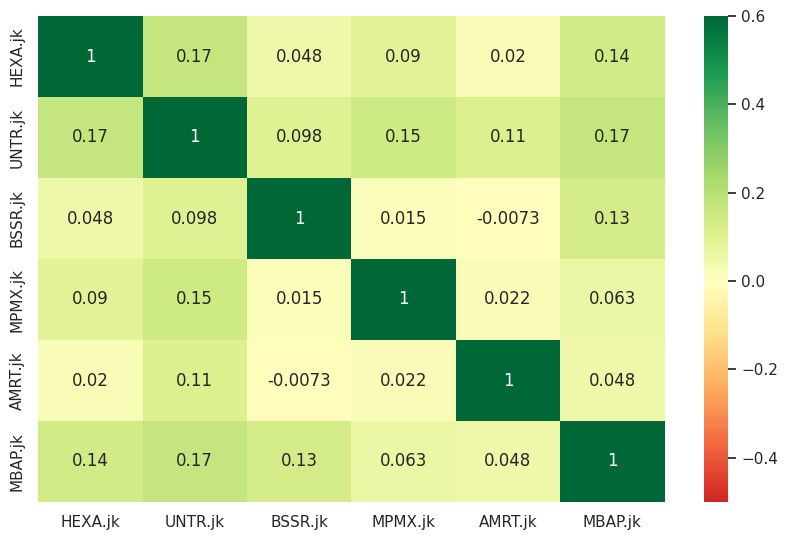

In [20]:
plt.figure(figsize = (9,6))
sns.heatmap(daily_change.corr(), annot = True, vmax = 0.6, vmin = -0.5, center = 0, cmap = 'RdYlGn')
sns.set(font_scale = 1.0)
plt.show()

## Stock Correlation 

the highest positive correlation between stocks selected above is between UNTR, HEXA, and MBAP with the correlation of 0.17